##### Objective

The main aim of this project is:
- To gather real-time Mutual Fund data from the Association of Mutual Funds in India (AMFI).
- To analyze and predict NAV values using regression models.

##### Setup & Libraries

In [ ]:
import pandas as pd                                                             # helps working with data, especially in tables (like rows and columns in a spreadsheet) # widely used for data analysis and manipulation
import numpy as np
import matplotlib.pyplot as plt                                                 # used for data visualization
%matplotlib inline
import pprint                                                                   # pretty print helps display information in a way that’s easy to read

##### Data Collection

*In Python, a "Module" is like a special toolbox filled with different tools (Functions) that can help you do specific tasks without needing to build everything from scratch.*

The "mftool" module is one of these toolboxes, and it’s designed specifically to get information about Mutual Funds in India.  

With mftool, we can:

- Look up the current value of different mutual funds
- See a list of all available mutual fund options
- Check the history of a fund’s value over time

In [ ]:
##### Run this module into your terminal
!pip install mftool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mftool: filename=mftool-2.8-py3-none-any.whl size=116617 sha256=62a6fae9fbcca79974579d23aa9836d930ce58111c1845f60a792c28d5e63249
  Stored in directory: /root/.cache/pip/wheels/b6/b3/af/5751d41db5452227e221aaca7f1ec823caa51ae7d40fb9dbde
Successfully built mftool


In [ ]:
##### Import module and create an object for Mftool
from mftool import Mftool

obj = Mftool()

In [ ]:
##### List of Mutual Funds Scheme Codes & Names with get_scheme_codes() method
##### Scheme codes are like unique IDs for each mutual fund, so we can keep track of them
data = obj.get_scheme_codes()

print(len(data))
print(type(data))
pprint.pprint(data)

Streaming output truncated to the last 5000 lines.
           'Plan',
 '148095': 'NIPPON INDIA CREDIT RISK FUND - SEGREGATED PORTFOLIO 1 - QUARTERLY '
           'IDCW Option',
 '148096': 'NIPPON INDIA CREDIT RISK FUND - SEGREGATED PORTFOLIO 1 - Direct '
           'Plan - IDCW Option',
 '148097': 'NIPPON INDIA CREDIT RISK FUND - SEGREGATED PORTFOLIO 1 - IDCW '
           'Option',
 '148098': 'NIPPON INDIA CREDIT RISK FUND - SEGREGATED PORTFOLIO 1 - Direct '
           'Plan - QUARTERLY IDCW Option',
 '148100': 'Nippon India Credit Risk Fund - Segregated Portfolio 1 - '
           'Institutional Growth Plan',
 '148101': 'Nippon India Credit Risk Fund - Segregated Portfolio 1 - Direct '
           'Plan - Growth Plan',
 '148104': 'UTI Regular Saving Fund ( Segregated - 17022020) - Regular Plan - '
           'Monthly IDCW',
 '148105': 'UTI - Regular Saving Fund (Segregated - 17022020) - Regular Plan - '
           'Growth Option',
 '148106': 'UTI - Regular Saving Fund (Segregated - 1702

In [ ]:
##### Display the data as a DataFrame (a table-like structure) instead of a dictionary
##### Which makes it easier to view if you have a large amount of data
df = pd.DataFrame.from_dict(data, orient='index', columns=['Value']).reset_index()
df.columns = ['Scheme Code', 'Scheme Name']
df = df.drop(index=0).reset_index(drop=True)
print(len(df))

13605


In [ ]:
df.head()

,Scheme Code,Scheme Name
0,119551,Aditya Birla Sun Life Banking & PSU Debt Fund ...
1,119552,Aditya Birla Sun Life Banking & PSU Debt Fund ...
2,119553,Aditya Birla Sun Life Banking & PSU Debt Fund ...
3,108272,Aditya Birla Sun Life Banking & PSU Debt Fund ...
4,110282,Aditya Birla Sun Life Banking & PSU Debt Fund ...


##### Display the Scheme Code for specific Scheme Name

In [ ]:
initials = input("Please suggest the initials of the scheme name: ")            # prompt for input the scheme name

matching_schemes = df[df["Scheme Name"].str.contains(initials, case=False)]     # filter the DataFrame for names that contain the initials

print(matching_schemes)                                                         # display the matching scheme codes and names

Please suggest the initials of the scheme name: Nippon India Growth
     Scheme Code                                        Scheme Name
4189      118666  NIPPON INDIA GROWTH FUND - DIRECT Plan - IDCW ...
4190      118665  Nippon India Growth Fund - Direct Plan Growth ...
4191      118668  Nippon India Growth Fund - Direct Plan Growth ...
4192      100375             NIPPON INDIA GROWTH FUND - IDCW Option
4193      106260  NIPPON INDIA GROWTH FUND - INSTITUTIONAL Plan ...
4194      100376  Nippon India Growth Fund-Growth Plan-Bonus Option
4195      100377  Nippon India Growth Fund-Growth Plan-Growth Op...


In [ ]:
##### Getting a Scheme Quote with get_scheme_quote() methods
Scheme_Code = input("Please enter the scheme code: ")
data1 = obj.get_scheme_quote(Scheme_Code)

if data1:
   pprint.pprint(data1)
else:
   print("No data found for the provided scheme code.")

Please enter the scheme code: 118668
{'last_updated': '13-Nov-2024',
 'nav': '4250.3117',
 'scheme_code': '118668',
 'scheme_name': 'Nippon India Growth Fund - Direct Plan Growth Plan - Growth '
                'Option'}


In [ ]:
##### Display the data as a DataFrame (a table-like structure)
df1 = pd.DataFrame.from_dict(data1, orient='index').reset_index()               # Convert the Dictionary to a DataFrame
df1.columns = ['Key', 'Value']                                                  # Rename the columns for clarity
df1.head(10)

,Key,Value
0,scheme_code,118668
1,scheme_name,Nippon India Growth Fund - Direct Plan Growth ...
2,last_updated,13-Nov-2024
3,nav,4250.3117


In [ ]:
##### Get Scheme details with specific Scheme code using get_scheme_details() methods
data2 = obj.get_scheme_details(Scheme_Code)
pprint.pprint(data2)

{'fund_house': 'Nippon India Mutual Fund',
 'scheme_category': 'Equity Scheme - Mid Cap Fund',
 'scheme_code': 118668,
 'scheme_name': 'Nippon India Growth Fund - Direct Plan Growth Plan - Growth '
                'Option',
 'scheme_start_date': {'date': '02-01-2013', 'nav': '507.16170'},
 'scheme_type': 'Open Ended Schemes'}


In [ ]:
##### Get Scheme Historical NAV’s data using get_scheme_historical_nav() methods
data3 = obj.get_scheme_historical_nav(Scheme_Code)
# pprint.pprint(data3)

In [ ]:
##### Display the data as a DataFrame
df3 = pd.DataFrame(list(data3.items()))
df3.head(10)

,0,1
0,fund_house,Nippon India Mutual Fund
1,scheme_type,Open Ended Schemes
2,scheme_category,Equity Scheme - Mid Cap Fund
3,scheme_code,118668
4,scheme_name,Nippon India Growth Fund - Direct Plan Growth ...
5,scheme_start_date,"{'date': '02-01-2013', 'nav': '507.16170'}"
6,data,"[{'date': '13-11-2024', 'nav': '4250.31170'}, ..."


##### Data Extraction

In [ ]:
##### List the Historical NAV Data
Hist_NAV = data3 ['data']

#### Display this data as DataFrame
df_Hist_NAV = pd.DataFrame(Hist_NAV, columns=["date", "nav"])
df_Hist_NAV.head()

,date,nav
0,13-11-2024,4250.31170
1,12-11-2024,4349.53410
2,11-11-2024,4393.60480
3,08-11-2024,4407.60240
4,07-11-2024,4447.92100


In [ ]:
pprint.pprint(Hist_NAV)

[{'date': '13-11-2024', 'nav': '4250.31170'},
 {'date': '12-11-2024', 'nav': '4349.53410'},
 {'date': '11-11-2024', 'nav': '4393.60480'},
 {'date': '08-11-2024', 'nav': '4407.60240'},
 {'date': '07-11-2024', 'nav': '4447.92100'},
 {'date': '06-11-2024', 'nav': '4470.95360'},
 {'date': '05-11-2024', 'nav': '4392.94920'},
 {'date': '04-11-2024', 'nav': '4371.51340'},
 {'date': '31-10-2024', 'nav': '4388.91090'},
 {'date': '30-10-2024', 'nav': '4389.50920'},
 {'date': '29-10-2024', 'nav': '4393.86540'},
 {'date': '28-10-2024', 'nav': '4354.28520'},
 {'date': '25-10-2024', 'nav': '4348.59480'},
 {'date': '24-10-2024', 'nav': '4418.83590'},
 {'date': '23-10-2024', 'nav': '4427.02100'},
 {'date': '22-10-2024', 'nav': '4400.34880'},
 {'date': '21-10-2024', 'nav': '4506.20830'},
 {'date': '18-10-2024', 'nav': '4560.71560'},
 {'date': '17-10-2024', 'nav': '4547.99260'},
 {'date': '16-10-2024', 'nav': '4623.09160'},
 {'date': '15-10-2024', 'nav': '4640.00910'},
 {'date': '14-10-2024', 'nav': '46

In [ ]:
##### Save the DataFrame to a CSV file
# file_path = "/content/HistNAV_118668.csv"                                       # Update the file path to a location accessible in Colab
# df_Hist_NAV.to_csv(file_path, index=False)                                      # Save the DataFrame as a CSV file
# print(f"Historical NAV data for the scheme code-{Scheme_Code} saved to: {file_path}")

In [ ]:
##### Downlaod the file for Google Colab
# from google.colab import files
# files.download(file_path)

##### Exploratory Data Analysis and Preprocessing



In [ ]:
##### Clone the dataset
mutfnd_df = df_Hist_NAV
mutfnd_df.head()

,date,nav
0,13-11-2024,4250.31170
1,12-11-2024,4349.53410
2,11-11-2024,4393.60480
3,08-11-2024,4407.60240
4,07-11-2024,4447.92100


In [ ]:
##### Dimensions and summary information about the DataFrame (data types, non-null counts, memory usage)
mutfnd_df.shape
mutfnd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2920 non-null   object
 1   nav     2920 non-null   object
dtypes: object(2)
memory usage: 45.8+ KB


In [ ]:
##### Change columns to specific data type
mutfnd_df['nav'] = mutfnd_df['nav'].astype(float)                               # convert NAV to float
mutfnd_df['date'] = pd.to_datetime(mutfnd_df['date'], format='%d-%m-%Y')        # convert Date to datetime

In [ ]:
##### Sort the data in ascending order by the 'date' column
##### best to arrange data in chronological order for time series analysis
mutfnd_df = mutfnd_df.sort_values(by='date', ascending=True).reset_index(drop=True)

In [ ]:
##### Calculate the previous day's closing price column
mutfnd_df['prev_close'] = mutfnd_df['nav'].shift(1)
mutfnd_df.head(5)

,date,nav,prev_close
0,2013-01-02,507.1617,NaN
1,2013-01-03,508.5350,507.1617
2,2013-01-04,510.0272,508.5350
3,2013-01-07,509.5146,510.0272
4,2013-01-08,508.5852,509.5146


In [ ]:
##### Calculate the 3-day trend column
mutfnd_df['close_3_days_ago'] = mutfnd_df['nav'].shift(3)                                                           # shift the closing prices by 3 days
mutfnd_df['trend_3_day'] = mutfnd_df['nav'] - mutfnd_df['close_3_days_ago']                                         # calculate the 3-day trend as the difference
mutfnd_df['trend_3_day'] = mutfnd_df['trend_3_day'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))           # classify the trend: +1 for upward, -1 for downward, 0 for neutral
mutfnd_df.head(5)

,date,nav,prev_close,close_3_days_ago,trend_3_day
0,2013-01-02,507.1617,NaN,NaN,0
1,2013-01-03,508.5350,507.1617,NaN,0
2,2013-01-04,510.0272,508.5350,NaN,0
3,2013-01-07,509.5146,510.0272,507.1617,1
4,2013-01-08,508.5852,509.5146,508.5350,1


*Though mutual funds don’t benefit as much from a 3-day trend*, there are cases where short-term analysis can still provide insights:

- Market Timing for Investment: For investors who regularly invest in mutual funds, watching short-term trends can help in timing their contributions, particularly in volatile markets.

- High-Volatility Funds: Funds with a focus on sectors like technology, commodities or emerging markets might see more short-term price movement. In this case, a brief trend might indicate an early reaction to significant events within those sectors.

In [ ]:
mutfnd_df.shape
mutfnd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2920 non-null   datetime64[ns]
 1   nav               2920 non-null   float64       
 2   prev_close        2919 non-null   float64       
 3   close_3_days_ago  2917 non-null   float64       
 4   trend_3_day       2920 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 114.2 KB


In [ ]:
##### Check the missing values
missing_values = mutfnd_df.isna().sum()
print(missing_values)

date                0
nav                 0
prev_close          1
close_3_days_ago    3
trend_3_day         0
dtype: int64


In [ ]:
##### Drop rows with missing values
mutfnd_df = mutfnd_df.dropna()
missing_values = mutfnd_df.isna().sum()
print(missing_values)
mutfnd_df.shape

date                0
nav                 0
prev_close          0
close_3_days_ago    0
trend_3_day         0
dtype: int64


(2917, 5)

##### Data Visualisation

Text(0.5, 1.0, 'NAV over Time')

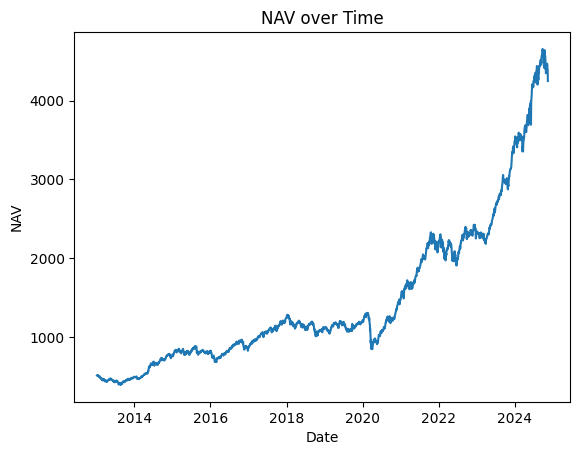

In [ ]:
##### NAV (net asset value) as a time series
plt.figsize=(50, 5)
plt.plot(mutfnd_df['date'], mutfnd_df['nav'])
plt.xlabel('Date')                                                              # Label for the x-axis
plt.ylabel('NAV')                                                               # Label for the y-axis (or any other label you want to set)
plt.title('NAV over Time')                                                      # Title for the graph (optional)

(array([18322., 18353., 18383., 18414., 18444., 18475., 18506., 18536.,
        18567.]),
 [Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11')])

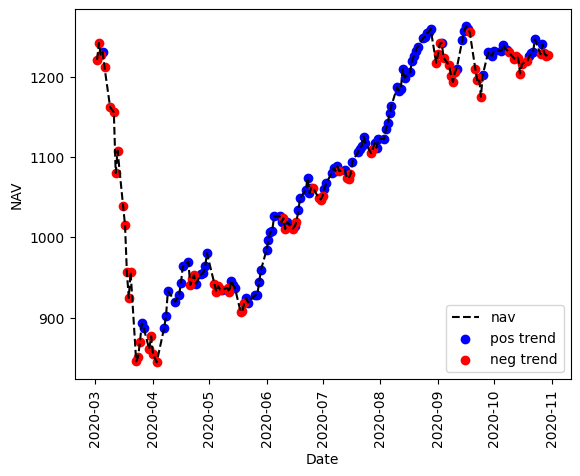

In [ ]:
##### Embed the 3-day trend into NAV for the defined range
start_date = '3-1-2020'
end_date = '10-30-2020'
plt.figsize=(50, 5)

plt.plot('date', 'nav', 'k--',
         data = (mutfnd_df.loc[mutfnd_df['date'].between(start_date, end_date)])
        )

plt.scatter('date', 'nav', color='b', label='pos trend',
            data = (mutfnd_df.loc[(mutfnd_df['trend_3_day'] == 1) & mutfnd_df['date'].between(start_date, end_date)])
          )

plt.scatter('date', 'nav', color='r', label='neg trend',
            data = (mutfnd_df.loc[(mutfnd_df['trend_3_day'] == -1) & mutfnd_df['date'].between(start_date, end_date)])
          )

plt.xlabel('Date')
plt.ylabel('NAV')
plt.legend()
plt.xticks(rotation = 90)

##### Regression Model

- Train a Linear Regression model with features: previous day’s closing price (prev_close) and 3-day trend (trend_3_day).
- Split data into training and test sets sequentially at a specific index.
- Maintain chronological order to suit time series analysis.

In [ ]:
##### Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mutfnd_df = mutfnd_df.drop(['date','close_3_days_ago'], axis=1)
print(mutfnd_df.columns)
print(mutfnd_df.dtypes)

Index(['nav', 'prev_close', 'trend_3_day'], dtype='object')
nav            float64
prev_close     float64
trend_3_day      int64
dtype: object


In [ ]:
##### Define features and target
features = ['prev_close', 'trend_3_day']
target = 'nav'

##### Separate the features (X) and target (y)
X = mutfnd_df[features]
y = mutfnd_df[target]

##### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

##### Create linear regression object
model=LinearRegression(fit_intercept=True)

##### Train the model using the training set
model.fit(X_train, y_train)

##### Make predictions using the testing set
y_pred = model.predict(X_test)

##### Evaluation

- MSE: Lower MSE indicates predictions are closer to actual values, while higher MSE shows more deviation. It’s in squared units, making it harder to interpret.
- RMSE: Provides an interpretable value in the same units as the data. Smaller RMSE indicates higher accuracy, while larger RMSE suggests lower accuracy.
- R² (Coefficient of Determination): Measures how well the model fits the data, representing the proportion of variance in the target variable explained by the features.


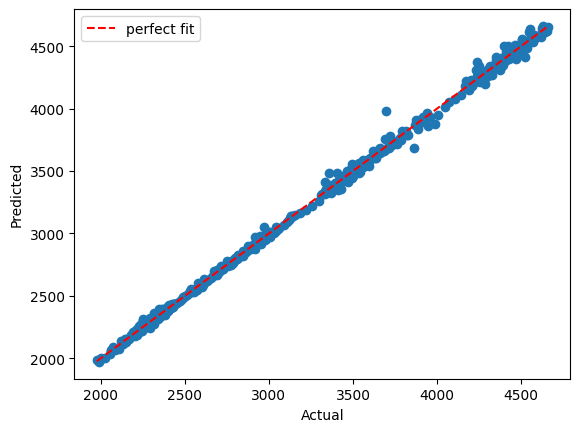

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='perfect fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [ ]:
##### Evaluate the perfromance of the Linear Regression Model
mse = mean_squared_error(y_test, y_pred)                                        # calculate the Mean Squared Error (MSE)
                                                                                # average of squared errors (differences between actual and predicted values)
rmse = np.sqrt(mse)                                                             # calculate the Root Mean Squared Error (RMSE)


r2 = r2_score(y_test, y_pred)                                                   # calculate the R-squared(R2) score/Variance Score
                                                                                # Explained R2: 1 is perfect prediction
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Squared Error (MSE): 873.1377
Root Mean Squared Error (RMSE): 29.5489
R-squared (R2) Score: 0.9986


Result:
RMSE of 29.24 means that the average prediction error is about 29.24 units in the currency of the mutual fund.
R² of 0.9987 is excellent, meaning your model explains 99.87% of the variance in the mutual fund's price data, which is very close to perfect.
Linear regression model is performing very well. It almost perfectly predicts the mutual fund prices with very little error, and only 0.13% of the variance is unexplained by your model.